In [121]:
# GitHub Repo Link: [YOUR_GITHUB_REPO_LINK_HERE]


# Importing libraries


In [123]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np


In [124]:
df = pd.read_csv(r"D:\Semester 4\AML Lab\diabetes.csv")

# Basic overview of the data


In [126]:
print("First 5 rows of the data:")
print(df.head())

print("\nTarget variable distribution:")
print(df['Outcome'].value_counts())

print("\nMissing values:")
print(df.isnull().sum())

print("\nData types:")
print(df.info())

print("\nSummary statistics:")
print(df.describe())

First 5 rows of the data:
   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1  

Target variable distribution:
Outcome
0    500
1    268
Name: count, dtype: int64

Missing values:
Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                        

# Handling missing values (imputation method)


In [128]:
import numpy as np

# Replace 0s with NaN in relevant columns, ensuring datatype
cols_to_replace = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']
df[cols_to_replace] = df[cols_to_replace].replace(0, np.nan).astype(float)

print("\nMissing values after replacing 0s with NaN:")
print(df.isnull().sum())

print("\nNumber of NaN values per column after replacement:")
print(df[cols_to_replace].isna().sum())

# Impute missing values with the mean of each column
for col in cols_to_replace:
    df[col] = df[col].fillna(df[col].mean())

print("\nMissing values after imputation:")
print(df.isnull().sum())

print("\nNumber of NaN values per column after imputation:")
print(df[cols_to_replace].isna().sum())

#show preprocessed dataset
print(df.describe())


Missing values after replacing 0s with NaN:
Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64

Number of NaN values per column after replacement:
Glucose            5
BloodPressure     35
SkinThickness    227
Insulin          374
BMI               11
dtype: int64

Missing values after imputation:
Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

Number of NaN values per column after imputation:
Glucose          0
BloodPressure    0
SkinThickness    0
Insulin          0
BMI              0
dtype: int64
       P

# Performing EDA including all types of plots to show the relation between features


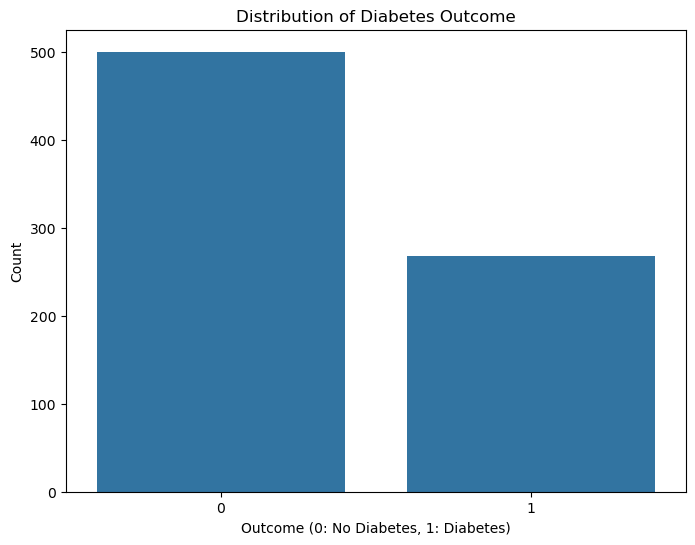

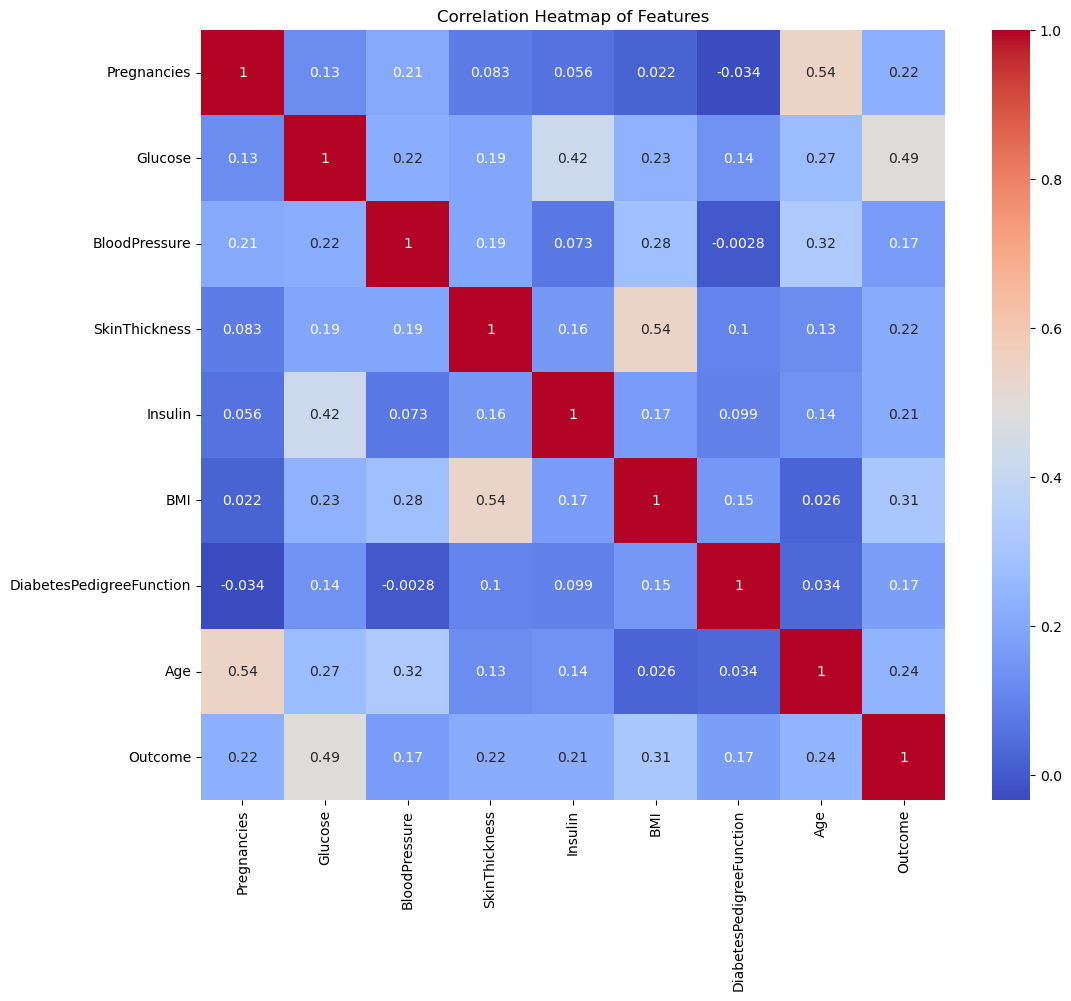

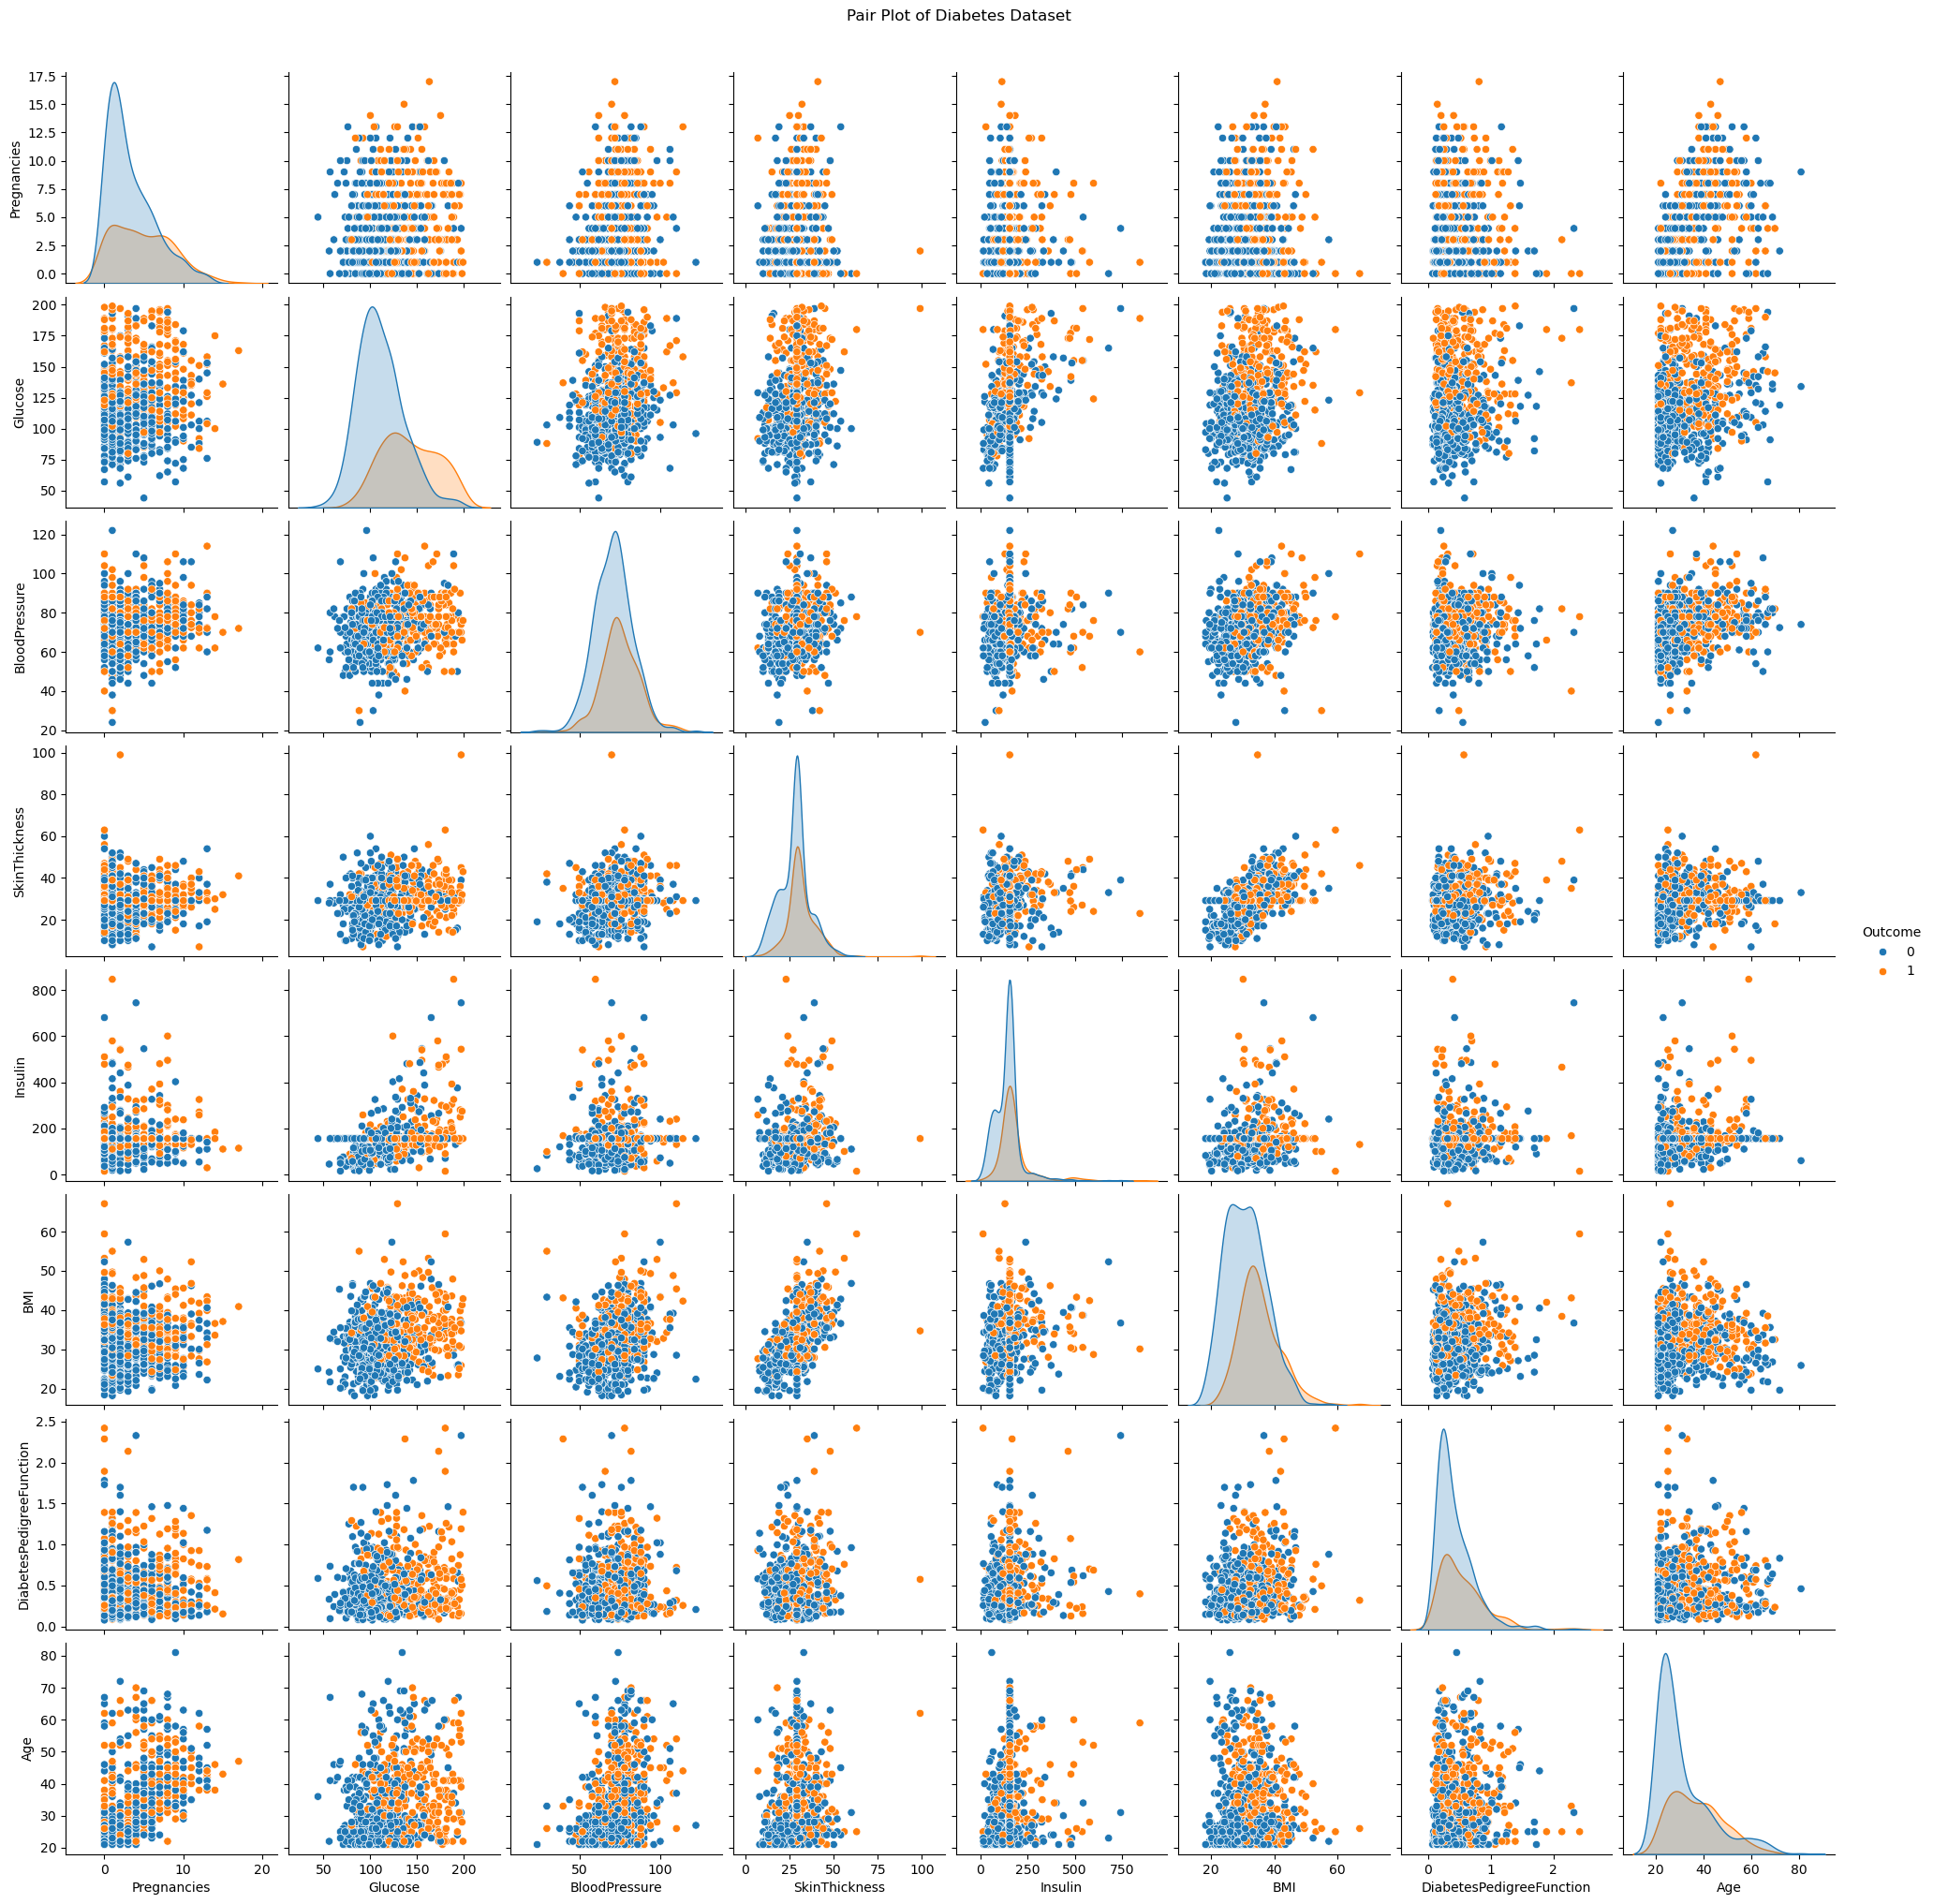

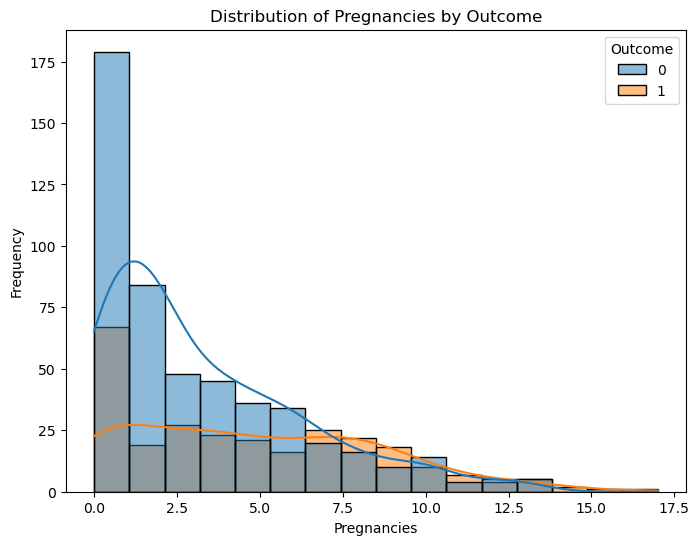

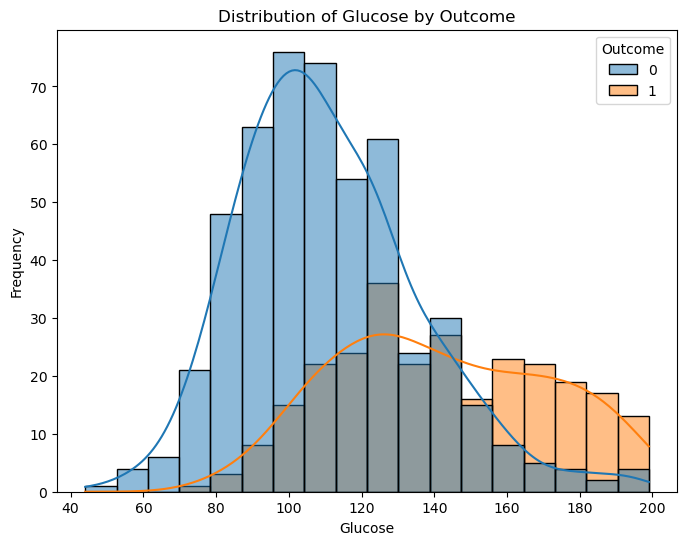

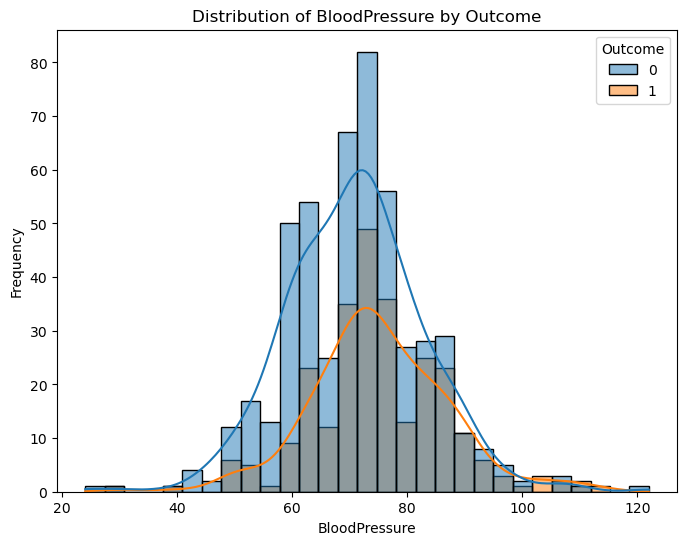

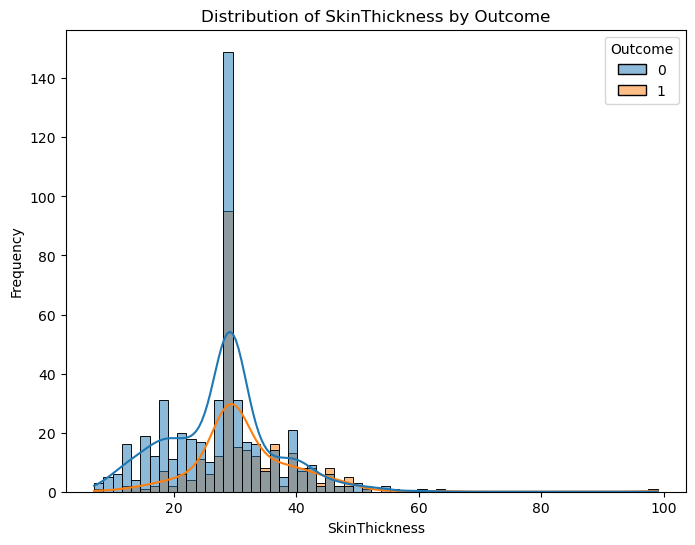

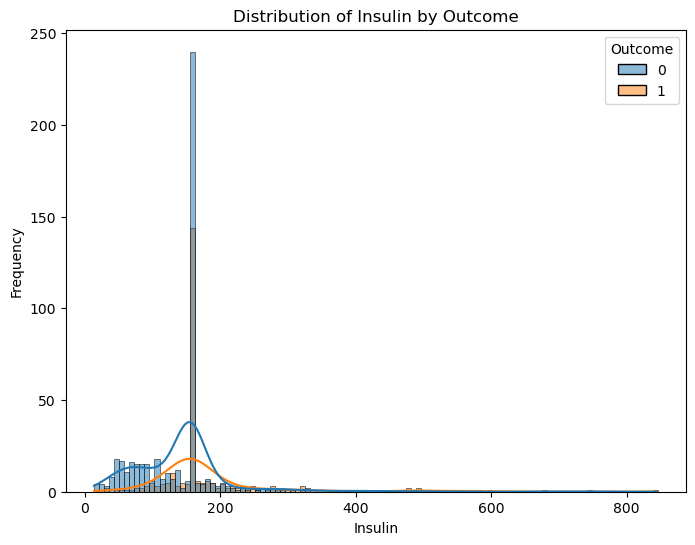

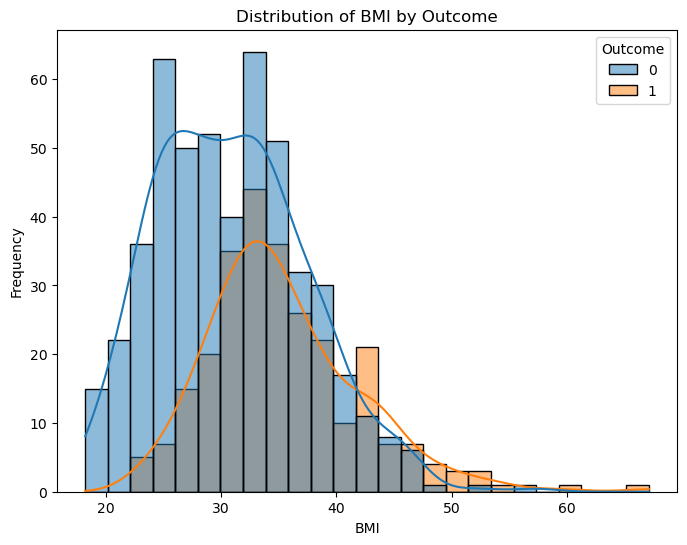

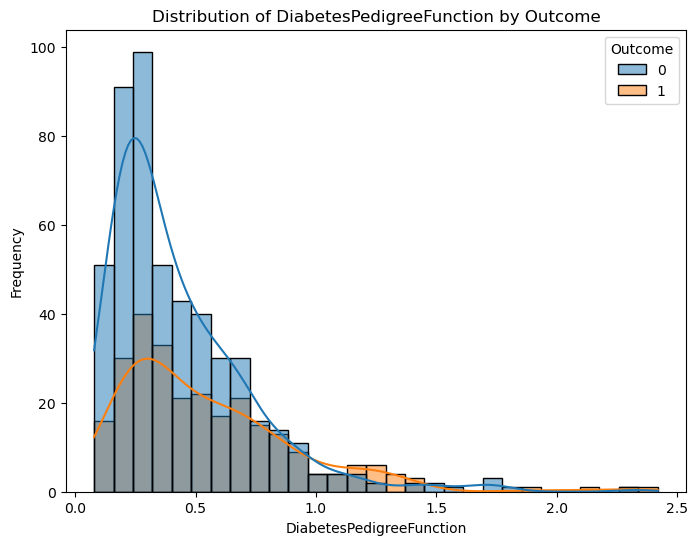

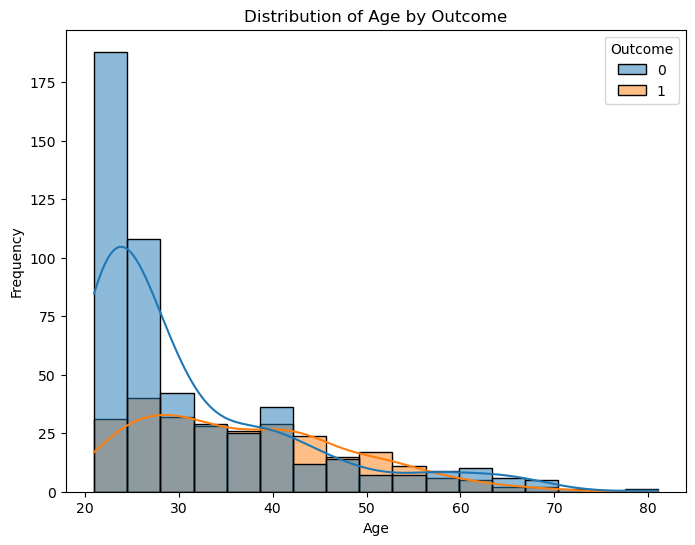

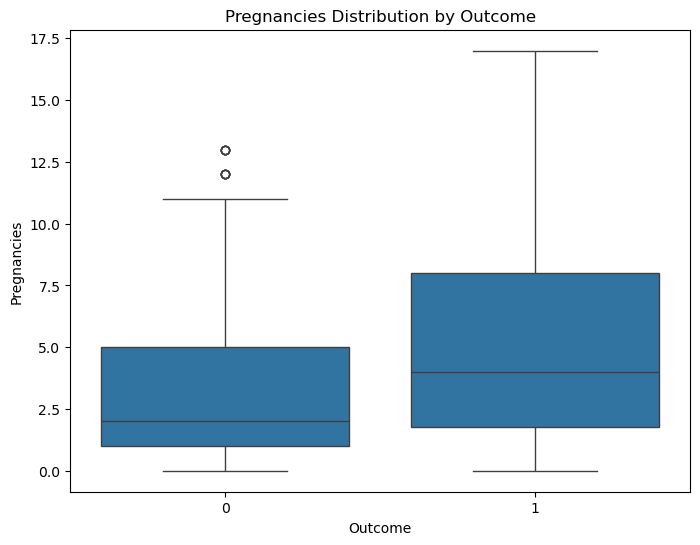

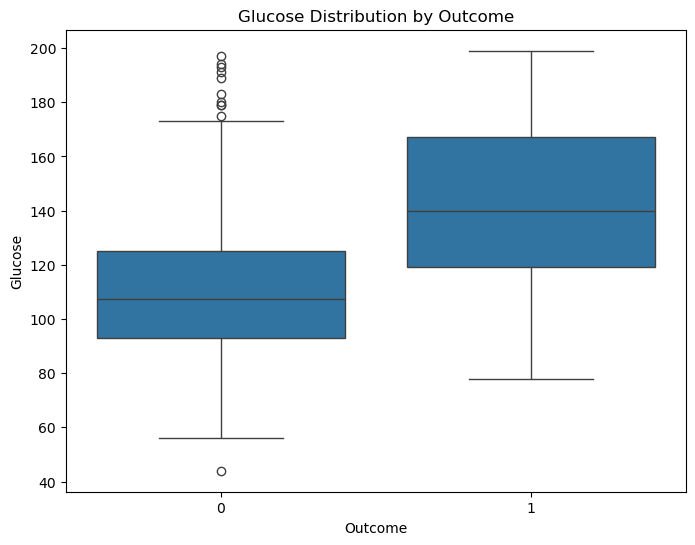

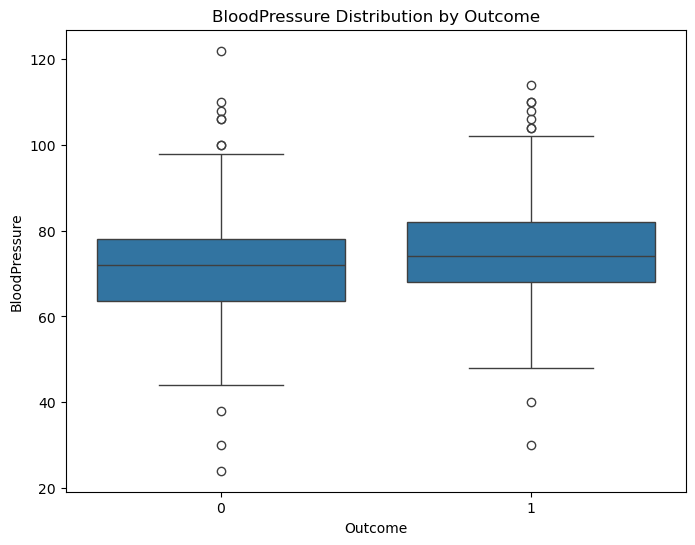

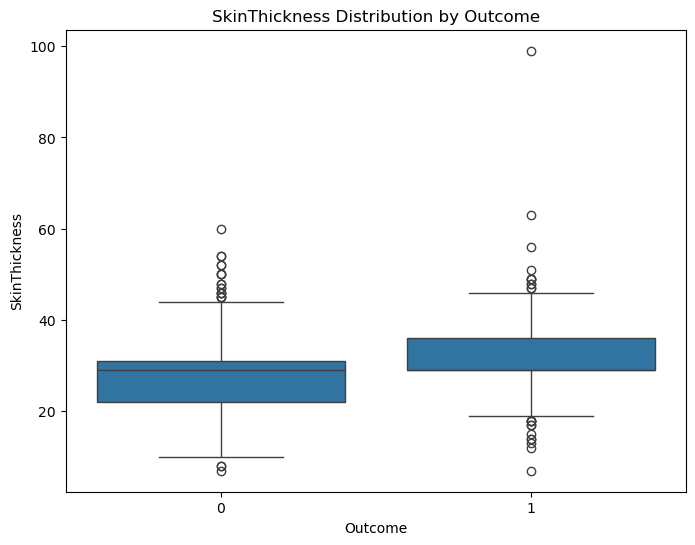

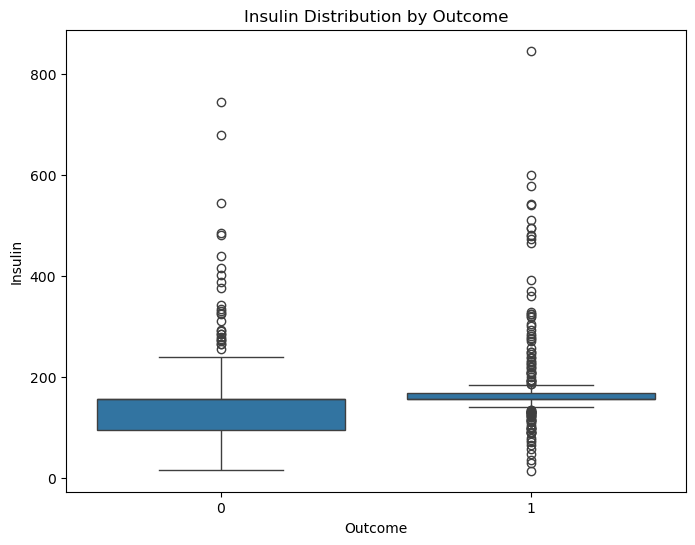

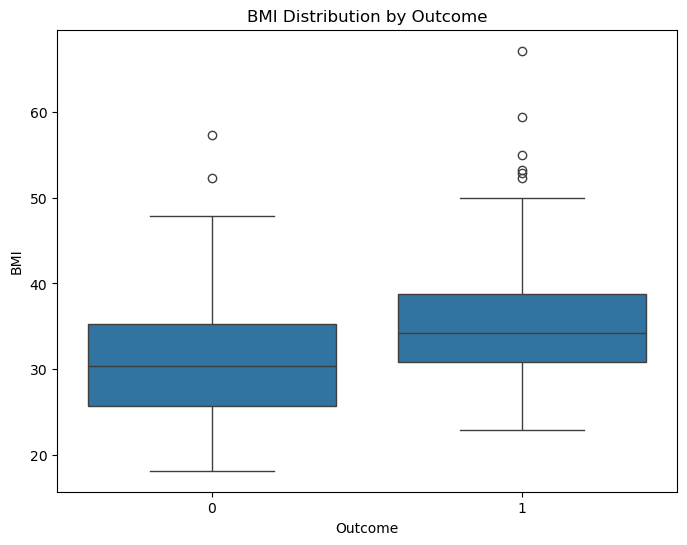

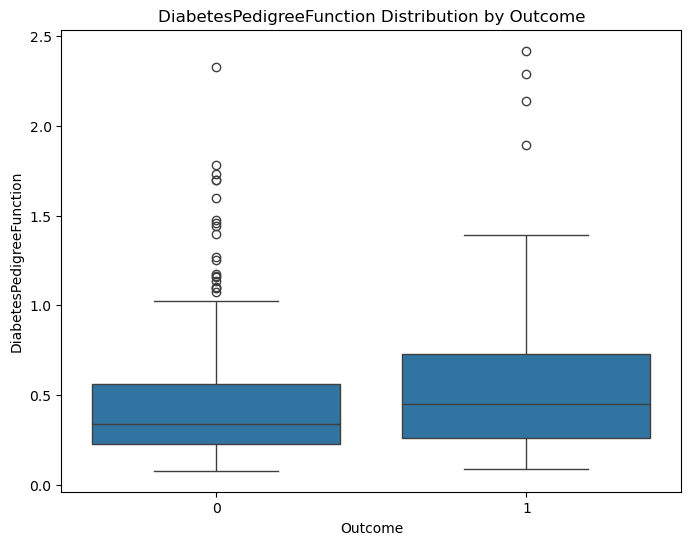

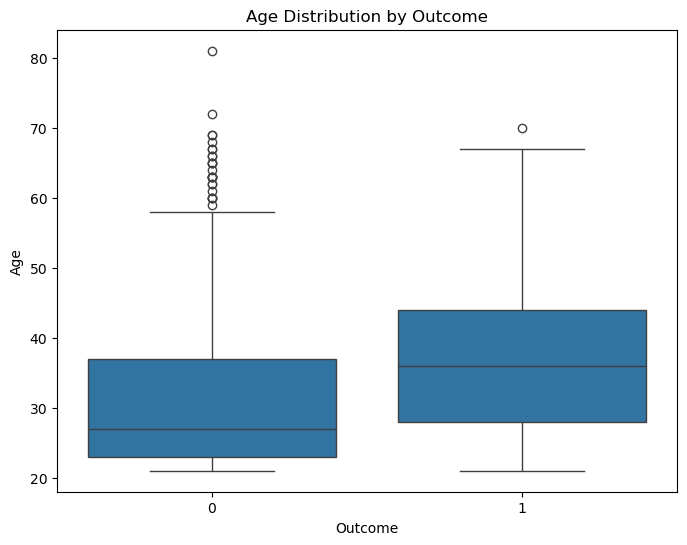

In [130]:
plt.figure(figsize=(8, 6))
sns.countplot(x='Outcome', data=df)
plt.title('Distribution of Diabetes Outcome')
plt.xlabel('Outcome (0: No Diabetes, 1: Diabetes)')
plt.ylabel('Count')
plt.show()

plt.figure(figsize=(12, 10))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap of Features')
plt.show()

# Pair plots
sns.pairplot(df, hue='Outcome')
plt.suptitle('Pair Plot of Diabetes Dataset', y=1.02)
plt.show()

for col in df.columns[:-1]:
    plt.figure(figsize=(8, 6))
    sns.histplot(data=df, x=col, hue='Outcome', kde=True)
    plt.title(f'Distribution of {col} by Outcome')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.show()

for col in df.columns[:-1]:
    plt.figure(figsize=(8, 6))
    sns.boxplot(x='Outcome', y=col, data=df)
    plt.title(f'{col} Distribution by Outcome')
    plt.xlabel('Outcome')
    plt.ylabel(col)
    plt.show()

# Divide the dataset into dependent and independent (feature selection)


In [132]:
X = df.drop('Outcome', axis=1)
y = df['Outcome']

print("\nIndependent features (X):")
print(X.head())

print("\nDependent feature (y):")
print(y.head())


Independent features (X):
   Pregnancies  Glucose  BloodPressure  SkinThickness     Insulin   BMI  \
0            6    148.0           72.0       35.00000  155.548223  33.6   
1            1     85.0           66.0       29.00000  155.548223  26.6   
2            8    183.0           64.0       29.15342  155.548223  23.3   
3            1     89.0           66.0       23.00000   94.000000  28.1   
4            0    137.0           40.0       35.00000  168.000000  43.1   

   DiabetesPedigreeFunction  Age  
0                     0.627   50  
1                     0.351   31  
2                     0.672   32  
3                     0.167   21  
4                     2.288   33  

Dependent feature (y):
0    1
1    0
2    1
3    0
4    1
Name: Outcome, dtype: int64


# Split dataset into train and test split


In [134]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

print("\nShape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_test:", y_test.shape)


Shape of X_train: (537, 8)
Shape of X_test: (231, 8)
Shape of y_train: (537,)
Shape of y_test: (231,)


# Build the DT (using default criterion: gini index)


In [136]:
dt_gini = DecisionTreeClassifier(random_state=42)
dt_gini.fit(X_train, y_train)

print("\nDecision Tree (Gini Index) trained.")


Decision Tree (Gini Index) trained.


# Evaluate the model (Gini Index)


In [138]:
y_pred_gini = dt_gini.predict(X_test)
accuracy_gini = accuracy_score(y_test, y_pred_gini)
print(f"\nAccuracy of Decision Tree (Gini Index): {accuracy_gini:.4f}")
print("\nClassification Report (Gini Index):\n", classification_report(y_test, y_pred_gini))
print("\nConfusion Matrix (Gini Index):\n", confusion_matrix(y_test, y_pred_gini))


Accuracy of Decision Tree (Gini Index): 0.6970

Classification Report (Gini Index):
               precision    recall  f1-score   support

           0       0.79      0.74      0.76       151
           1       0.56      0.62      0.59        80

    accuracy                           0.70       231
   macro avg       0.67      0.68      0.67       231
weighted avg       0.71      0.70      0.70       231


Confusion Matrix (Gini Index):
 [[111  40]
 [ 30  50]]


# Visualize the DT (Gini Index)


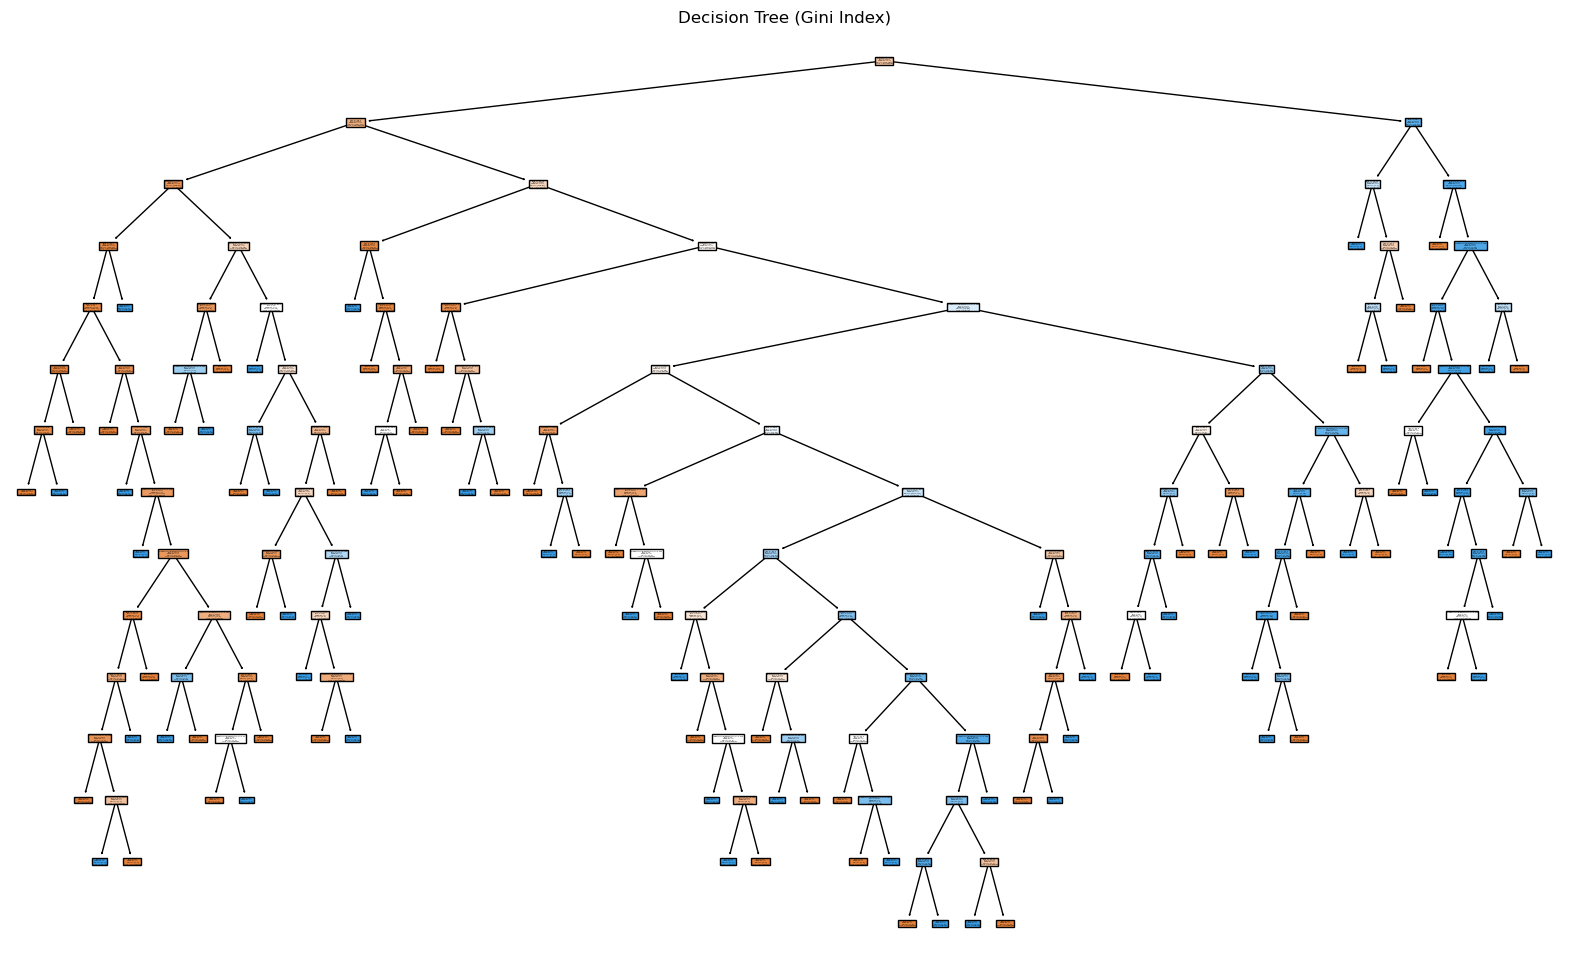

In [140]:
plt.figure(figsize=(20, 12))
plot_tree(dt_gini, feature_names=X.columns, class_names=['No Diabetes', 'Diabetes'], filled=True)
plt.title("Decision Tree (Gini Index)")
plt.show()

# Optimize the DT using other criterion like entropy for Information Gain


In [142]:
dt_entropy = DecisionTreeClassifier(criterion='entropy', random_state=42)
dt_entropy.fit(X_train, y_train)

print("\nDecision Tree (Entropy) trained.")


Decision Tree (Entropy) trained.


# Build and visualize the DT again using Entropy


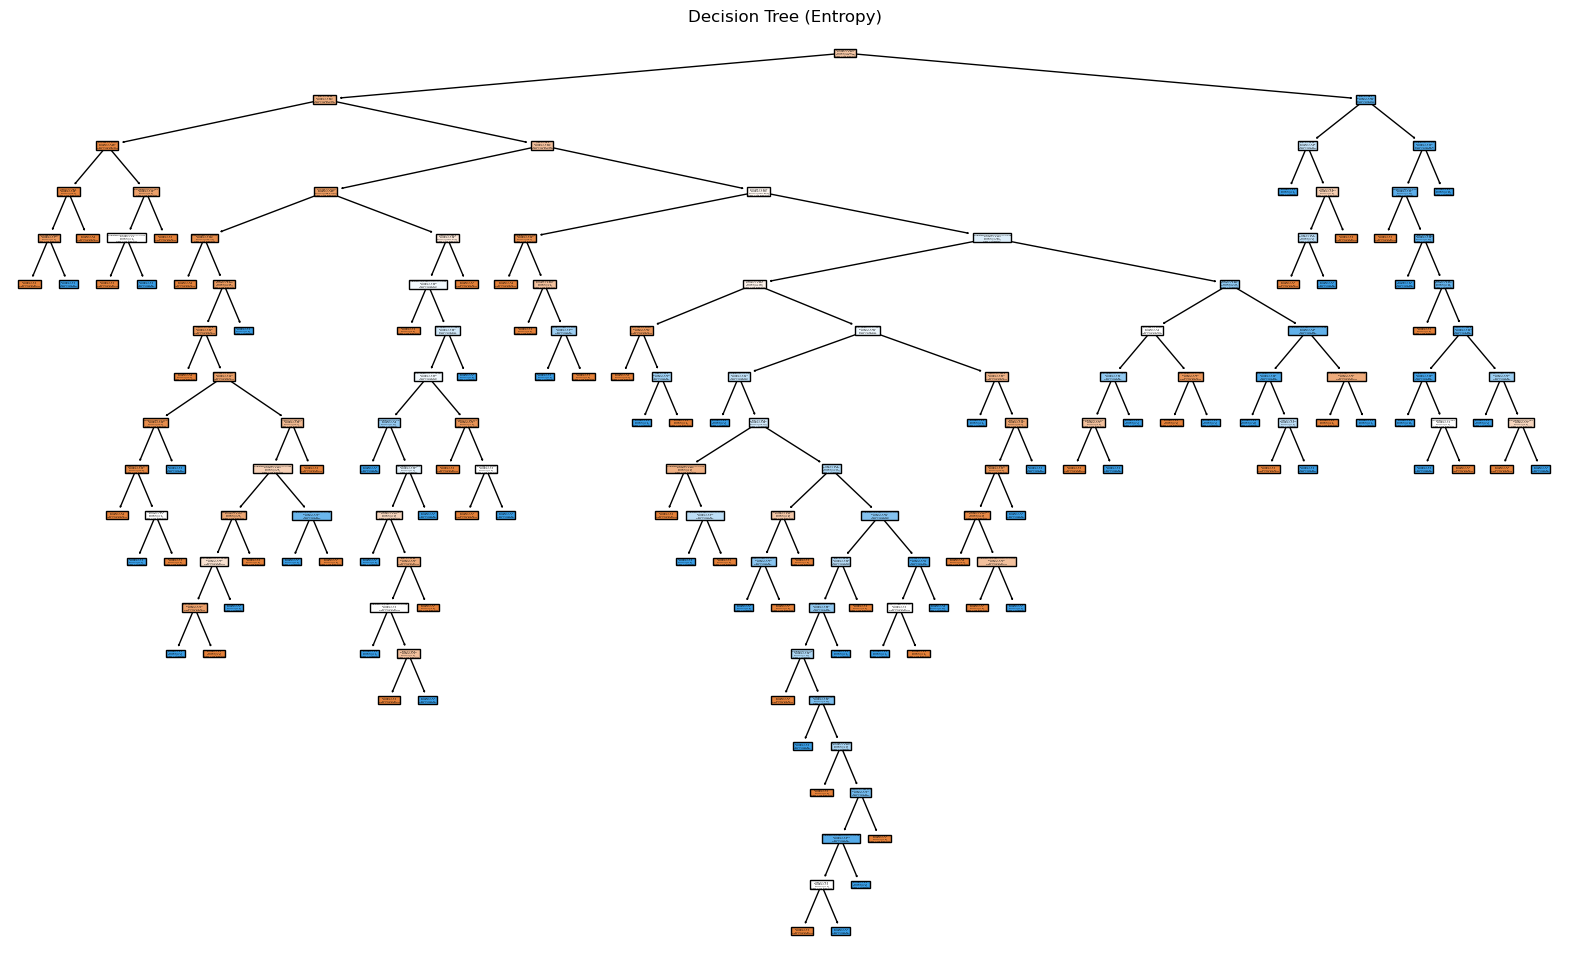

In [169]:
plt.figure(figsize=(20, 12))
plot_tree(dt_entropy, feature_names=X.columns, class_names=['No Diabetes', 'Diabetes'], filled=True)
plt.title("Decision Tree (Entropy)")
plt.show()

# Find the model performance (plot the confusion matrix and find the precision, recall, and fscore) for Entropy based DT



Accuracy of Decision Tree (Entropy): 0.7316

Classification Report (Entropy):
               precision    recall  f1-score   support

           0       0.82      0.75      0.78       151
           1       0.60      0.70      0.64        80

    accuracy                           0.73       231
   macro avg       0.71      0.72      0.71       231
weighted avg       0.75      0.73      0.74       231



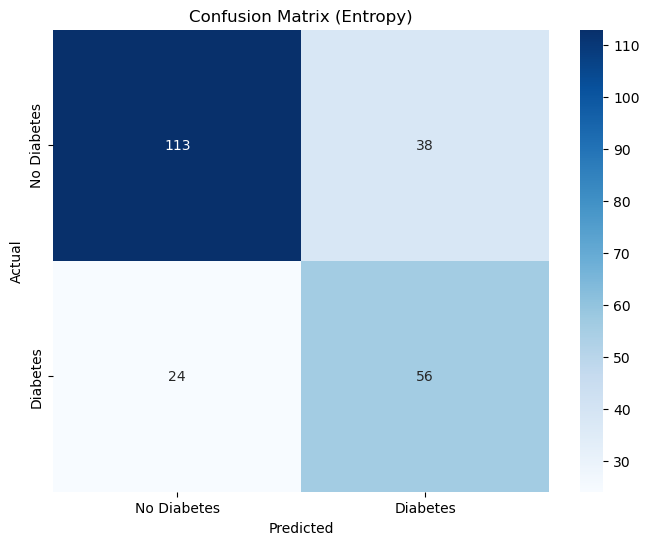

In [146]:
y_pred_entropy = dt_entropy.predict(X_test)
accuracy_entropy = accuracy_score(y_test, y_pred_entropy)
print(f"\nAccuracy of Decision Tree (Entropy): {accuracy_entropy:.4f}")
print("\nClassification Report (Entropy):\n", classification_report(y_test, y_pred_entropy))

cm_entropy = confusion_matrix(y_test, y_pred_entropy)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_entropy, annot=True, cmap='Blues', fmt='d',
            xticklabels=['No Diabetes', 'Diabetes'], yticklabels=['No Diabetes', 'Diabetes'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix (Entropy)')
plt.show()